In [1]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff("../hypothyroid_modified_cjlin.arff")
data = pd.DataFrame(data[0])
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,Class
0,41.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',1.30,2.5,125.0,1.14,109.0,b'SVHC',b'negative'
1,23.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',4.10,2.0,102.0,1.00,106.0,b'other',b'negative'
2,46.0,b'M',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.98,1.7,109.0,0.91,120.0,b'other',b'negative'
3,70.0,b'F',b't',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.16,1.9,175.0,1.00,106.0,b'other',b'negative'
4,70.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.72,1.2,61.0,0.87,70.0,b'SVI',b'negative'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,19.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',8.80,2.7,108.0,1.11,97.0,b'other',b'compensated_hypothyroid'
3394,68.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',1.00,2.1,124.0,1.08,114.0,b'SVI',b'negative'
3395,74.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',5.10,1.8,112.0,1.07,105.0,b'other',b'negative'
3396,72.0,b'M',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.70,2.0,82.0,0.94,87.0,b'SVI',b'negative'


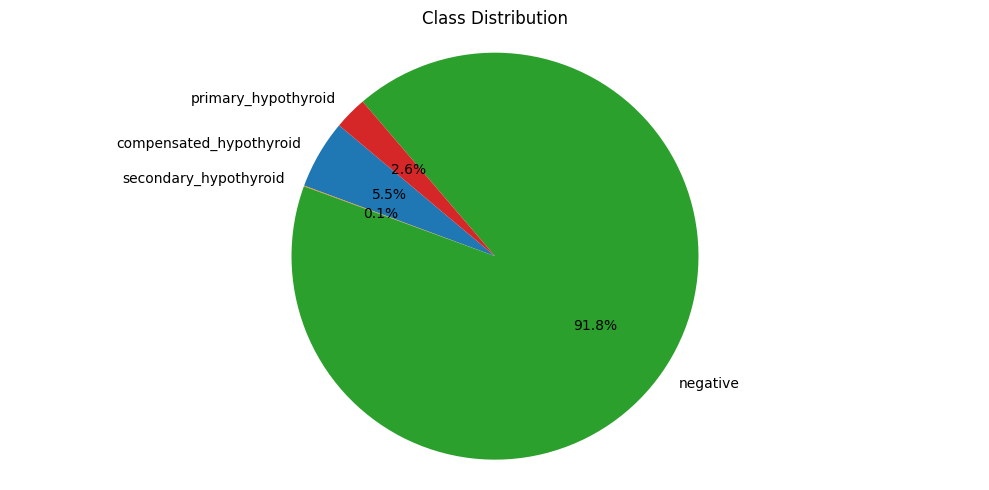

In [2]:
import matplotlib.pyplot as plt
ansType = {cls: 0 for cls in set(data["Class"])}
total = 0
for cls in data["Class"]:
    ansType[cls] += 1
    total += 1
    
# 將字串百分比轉成數值以便畫圖
labels = [key.decode() if isinstance(key, bytes) else str(key) for key in ansType.keys()]
values = [float(val) for val in ansType.values()]

# 畫出圓餅圖
plt.figure(figsize=(10, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Class Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.get_dummies(data)

x = data.iloc[:,0:-4]
y = data.iloc[:,-4:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

# 將 one-hot 轉回類別標籤以便 sklearn 相容
y_train_cls = np.argmax(y_train, axis=1)
y_test_cls = np.argmax(y_test, axis=1)

data

,age,TSH,T3,TT4,T4U,FTI,sex_b'F',sex_b'M',on thyroxine_b'f',on thyroxine_b't',...,psych_b't',referral source_b'STMW',referral source_b'SVHC',referral source_b'SVHD',referral source_b'SVI',referral source_b'other',Class_b'compensated_hypothyroid',Class_b'negative',Class_b'primary_hypothyroid',Class_b'secondary_hypothyroid'
0,41.0,1.30,2.5,125.0,1.14,109.0,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
1,23.0,4.10,2.0,102.0,1.00,106.0,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,46.0,0.98,1.7,109.0,0.91,120.0,False,True,True,False,...,False,False,False,False,False,True,False,True,False,False
3,70.0,0.16,1.9,175.0,1.00,106.0,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
4,70.0,0.72,1.2,61.0,0.87,70.0,True,False,True,False,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,19.0,8.80,2.7,108.0,1.11,97.0,True,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3394,68.0,1.00,2.1,124.0,1.08,114.0,True,False,True,False,...,False,False,False,False,True,False,False,True,False,False
3395,74.0,5.10,1.8,112.0,1.07,105.0,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
3396,72.0,0.70,2.0,82.0,0.94,87.0,False,True,True,False,...,False,False,False,False,True,False,False,True,False,False


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_bar_metrics(acc_list, f1_list, loss_list, model_name="Model"):
    runs = np.arange(1, len(acc_list) + 1)

    # 畫圖
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.bar(runs, acc_list, color='skyblue')
    plt.title(f"{model_name} - Accuracy per Run")
    plt.xlabel("Run")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)

    plt.subplot(1, 3, 2)
    plt.bar(runs, loss_list, color='salmon')
    plt.title(f"{model_name} - Log Loss per Run")
    plt.xlabel("Run")
    plt.ylabel("Loss")

    plt.subplot(1, 3, 3)
    plt.bar(runs, f1_list, color='lightgreen')
    plt.title(f"{model_name} - F1 Score per Run")
    plt.xlabel("Run")
    plt.ylabel("F1 Macro")
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()

    # 整理成表格
    df = pd.DataFrame({
        "Run": runs,
        "Accuracy": np.round(acc_list, 4),
        "Log Loss": np.round(loss_list, 4),
        "F1 Macro": np.round(f1_list, 4)
    })

    print(f"\n {model_name} - Detailed Results:")
    print(df.to_string(index=False))

    # 清除避免污染
    acc_list.clear()
    f1_list.clear()
    loss_list.clear()


In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.utils.multiclass import unique_labels
import numpy as np
import pandas as pd

acc_list, f1_list, loss_list = [], [], []
results_grid = []

# Naive Bayes 沒有太多可調參數，但我們測試 var_smoothing
param_grid_nb = {
    'clf__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

all_labels = list(np.unique(np.concatenate([y_train_cls, y_test_cls])))

for run in range(10):
    print(f"\nRun {run + 1}")

    pipe = Pipeline([
        ('clf', GaussianNB())
    ])

    grid = GridSearchCV(pipe, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(x_train, y_train_cls)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    y_prob = best_model.predict_proba(x_test)

    acc = accuracy_score(y_test_cls, y_pred)
    f1 = f1_score(y_test_cls, y_pred, average='macro')
    loss = log_loss(y_test_cls, y_prob, labels=all_labels)

    acc_list.append(acc)
    f1_list.append(f1)
    loss_list.append(loss)

    # 各超參數組合的結果
    for i in range(len(grid.cv_results_['params'])):
        params = grid.cv_results_['params'][i]
        clf = GaussianNB(var_smoothing=params['clf__var_smoothing'])
        clf.fit(x_train, y_train_cls)
        y_pred_i = clf.predict(x_test)
        y_prob_i = clf.predict_proba(x_test)
        acc_i = accuracy_score(y_test_cls, y_pred_i)
        f1_i = f1_score(y_test_cls, y_pred_i, average='macro')
        loss_i = log_loss(y_test_cls, y_prob_i, labels=all_labels)

        results_grid.append({
            'var_smoothing': params['clf__var_smoothing'],
            'acc': acc_i,
            'loss': loss_i,
            'f1': f1_i
        })



Run 1


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Run 2

Run 3


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Run 4

Run 5


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Run 6

Run 7


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Run 8

Run 9


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Run 10


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [6]:
df_results = pd.DataFrame(results_grid)
print("\n 所有參數組合結果：")
print(df_results.sort_values(by='acc', ascending=False).reset_index(drop=True))


 所有參數組合結果：
    var_smoothing       acc       loss        f1
0    1.000000e-06  0.286765   8.289722  0.173742
1    1.000000e-06  0.286765   8.289722  0.173742
2    1.000000e-06  0.286765   8.289722  0.173742
3    1.000000e-06  0.286765   8.289722  0.173742
4    1.000000e-06  0.286765   8.289722  0.173742
5    1.000000e-06  0.286765   8.289722  0.173742
6    1.000000e-06  0.286765   8.289722  0.173742
7    1.000000e-06  0.286765   8.289722  0.173742
8    1.000000e-06  0.286765   8.289722  0.173742
9    1.000000e-06  0.286765   8.289722  0.173742
10   1.000000e-07  0.126471  20.169977  0.079558
11   1.000000e-07  0.126471  20.169977  0.079558
12   1.000000e-07  0.126471  20.169977  0.079558
13   1.000000e-07  0.126471  20.169977  0.079558
14   1.000000e-07  0.126471  20.169977  0.079558
15   1.000000e-07  0.126471  20.169977  0.079558
16   1.000000e-07  0.126471  20.169977  0.079558
17   1.000000e-07  0.126471  20.169977  0.079558
18   1.000000e-07  0.126471  20.169977  0.079558
19   1.0

In [7]:
best_acc_row = df_results.loc[df_results['acc'].idxmax()]
best_loss_row = df_results.loc[df_results['loss'].idxmin()]
best_f1_row = df_results.loc[df_results['f1'].idxmax()]

print("\n 最佳 Accuracy 組合：")
print(best_acc_row.to_frame().T)

print("\n 最低 Loss 組合：")
print(best_loss_row.to_frame().T)

print("\n 最高 F1 Score 組合：")
print(best_f1_row.to_frame().T)


 最佳 Accuracy 組合：
   var_smoothing       acc      loss        f1
3       0.000001  0.286765  8.289722  0.173742

 最低 Loss 組合：
   var_smoothing       acc      loss        f1
3       0.000001  0.286765  8.289722  0.173742

 最高 F1 Score 組合：
   var_smoothing       acc      loss        f1
3       0.000001  0.286765  8.289722  0.173742


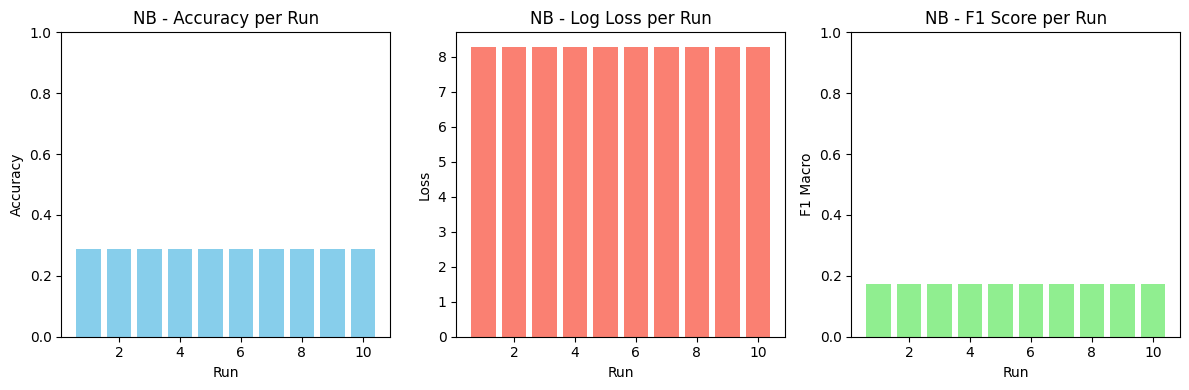


 NB - Detailed Results:
 Run  Accuracy  Log Loss  F1 Macro
   1    0.2868    8.2897    0.1737
   2    0.2868    8.2897    0.1737
   3    0.2868    8.2897    0.1737
   4    0.2868    8.2897    0.1737
   5    0.2868    8.2897    0.1737
   6    0.2868    8.2897    0.1737
   7    0.2868    8.2897    0.1737
   8    0.2868    8.2897    0.1737
   9    0.2868    8.2897    0.1737
  10    0.2868    8.2897    0.1737


In [8]:
plot_bar_metrics(acc_list, f1_list, loss_list, model_name="NB")